# Problem 1 : Predicting CentralAir using SalePrice

In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy

In [9]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [10]:
csv_data = pd.read_csv('train.csv', header = 0)

#### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


[Text(621.7714285714286, 782.784, 'SalePrice <= 98150.0\ngini = 0.117\nsamples = 1168\nvalue = [73, 1095]\nclass = Has CentralAC'),
 Text(318.8571428571429, 608.832, 'SalePrice <= 61691.5\ngini = 0.49\nsamples = 84\nvalue = [36, 48]\nclass = Has CentralAC'),
 Text(127.54285714285714, 434.88, 'SalePrice <= 46000.0\ngini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = No CentralAC'),
 Text(63.77142857142857, 260.928, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No CentralAC'),
 Text(191.31428571428572, 260.928, 'SalePrice <= 53500.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = No CentralAC'),
 Text(127.54285714285714, 86.976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Has CentralAC'),
 Text(255.0857142857143, 86.976, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No CentralAC'),
 Text(510.1714285714286, 434.88, 'SalePrice <= 97750.0\ngini = 0.466\nsamples = 73\nvalue = [27, 46]\nclass = Has CentralAC'),
 Text(446.4, 260.928, 'SalePrice <= 96750.0\ngini = 0.451\nsam

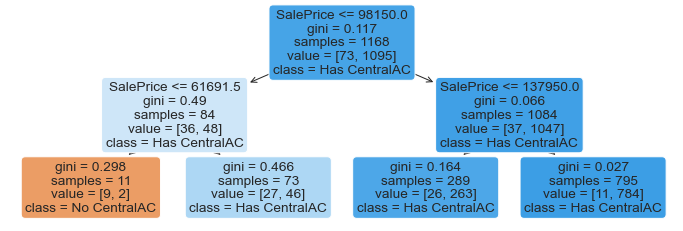

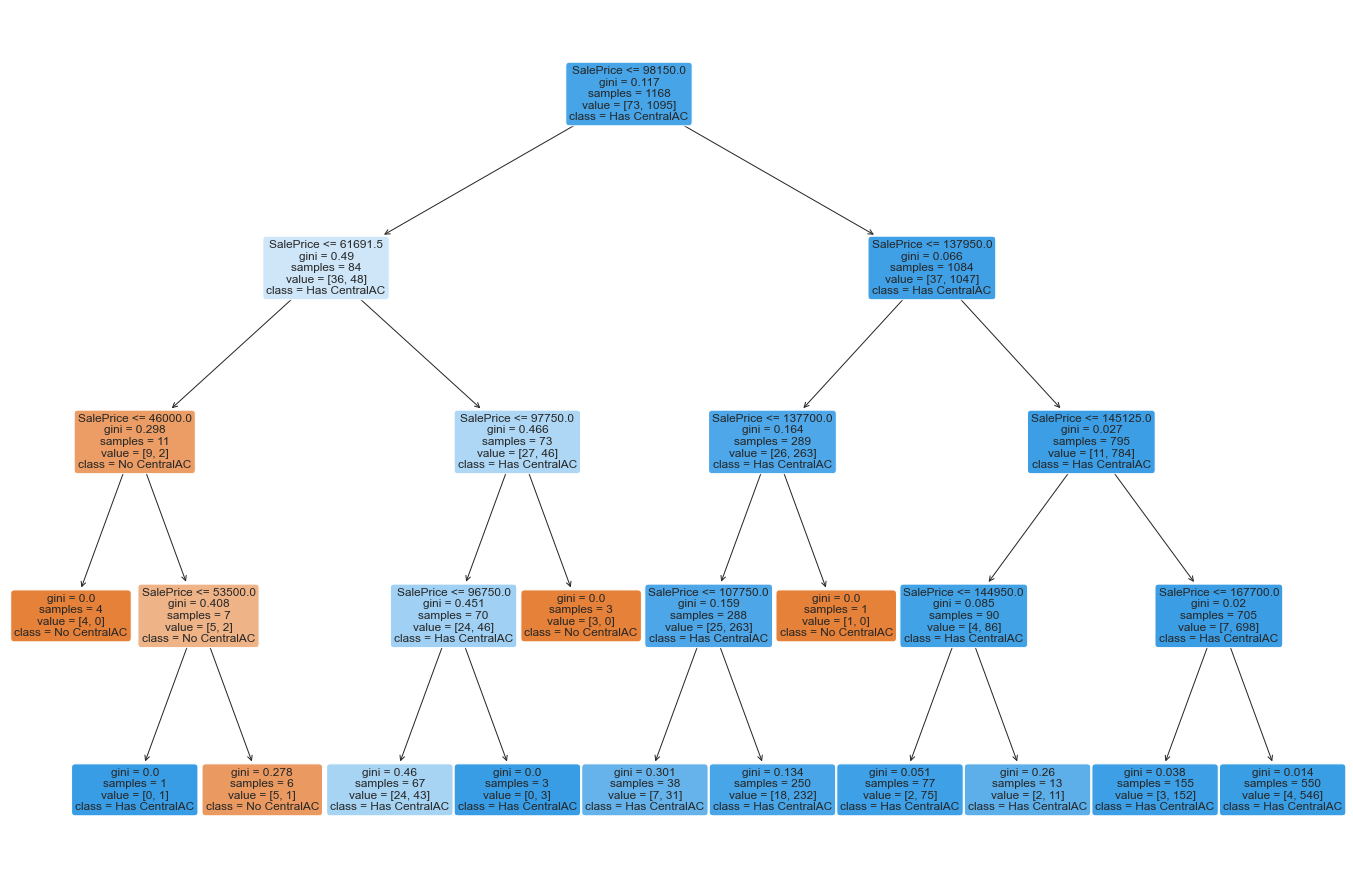

In [95]:
SalePrice = pd.DataFrame(csv_data['SalePrice']) # Predictor
CentralAir = pd.DataFrame(csv_data['CentralAir']) # Response
# CentralAir: Central Air Conditioning

#80-20 Split
from sklearn.model_selection import train_test_split
CentralAir_train, CentralAir_test, SalePrice_train, SalePrice_test = train_test_split(CentralAir, SalePrice, test_size = 0.2)

# Check the sample sizes
print("Train Set :", CentralAir_train.shape, SalePrice_train.shape)
print("Test Set  :", CentralAir_test.shape, SalePrice_test.shape)

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)
# Train the Decision Tree Classifier model
dectree.fit(SalePrice_train, CentralAir_train)

# Create a Decision Tree Classifier object
dectree2 = DecisionTreeClassifier(max_depth = 4)
# Train the Decision Tree Classifier model
dectree2.fit(SalePrice_train, CentralAir_train)

f = plt.figure(figsize=(12,4))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No CentralAC","Has CentralAC"])
f = plt.figure(figsize=(24,16))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No CentralAC","Has CentralAC"])

#### b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

Goodness of Fit of Model 	Train Dataset 2 Depths
Classification Accuracy 	: 0.9434931506849316
True Positive Rate 	: 0.9981735159817352
False Positive Rate 	: 0.8767123287671232

Goodness of Fit of Model 	Test Dataset 2 Depths
Classification Accuracy 	: 0.9383561643835616
True Positive Rate 	: 1.0
False Positive Rate 	: 0.8181818181818182


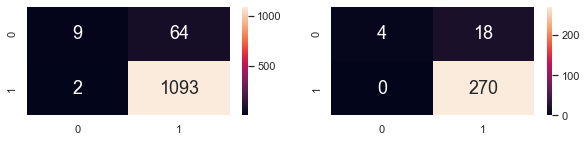

In [96]:
X_train = SalePrice_train
X_test = SalePrice_test
y_train = CentralAir_train
y_test = CentralAir_test

# Predict values
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

import sklearn.metrics as metrics
# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 2))
cmTrain = confusion_matrix(y_train, y_train_pred)
cmTest = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cmTest, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset 2 Depths")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t:", cmTrain[1][1]/(cmTrain[1][1]+cmTrain[1][0]))
print("False Positive Rate \t:", cmTrain[0][1]/(cmTrain[0][0]+cmTrain[0][1]))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset 2 Depths")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t:", cmTest[1][1]/(cmTest[1][1]+cmTest[1][0]))
print("False Positive Rate \t:", cmTest[0][1]/(cmTest[0][0]+cmTest[0][1]))

Goodness of Fit of Model 	Train Dataset 4 Depths
Classification Accuracy 	: 0.9477739726027398
True Positive Rate 	: 0.9990867579908675
False Positive Rate 	: 0.821917808219178

Goodness of Fit of Model 	Test Dataset 4 Depths
Classification Accuracy 	: 0.934931506849315
True Positive Rate 	: 1.0
False Positive Rate 	: 0.8636363636363636


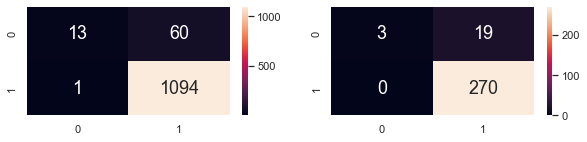

In [97]:
# Predict values
y_train_pred = dectree2.predict(X_train)
y_test_pred = dectree2.predict(X_test)

import sklearn.metrics as metrics

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 2))
cmTrain = confusion_matrix(y_train, y_train_pred)
cmTest = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cmTest, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset 4 Depths")
print("Classification Accuracy \t:", dectree2.score(X_train, y_train))
print("True Positive Rate \t:", cmTrain[1][1]/(cmTrain[1][1]+cmTrain[1][0]))
print("False Positive Rate \t:", cmTrain[0][1]/(cmTrain[0][0]+cmTrain[0][1]))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset 4 Depths")
print("Classification Accuracy \t:", dectree2.score(X_test, y_test))
print("True Positive Rate \t:", cmTest[1][1]/(cmTest[1][1]+cmTest[1][0]))
print("False Positive Rate \t:", cmTest[0][1]/(cmTest[0][0]+cmTest[0][1]))

Max Depth 2 is the better model as it has perfect TPR and lower FPR. In terms of CentralAir, it means that there is less chance that you expected Central Aircon but there actually is no Central Aircon

Hints and Pointers

o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.

o If you want to change the max depth of the tree, check the input parameters needed to instantiate the model.

o Think about the accuracy metrics for a tree carefully to determine which model is better and in which metrics.

# Problem 2 : Predicting CentralAir using Other Variables

Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to
predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor

In [59]:
def my_function(p, r):
    pred = pd.DataFrame(csv_data[p]) # Predictor
    res = pd.DataFrame(csv_data[r]) # Response

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(pred, res, test_size = 0.2)

    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model

    # Predict values
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    cmTrain = confusion_matrix(y_train, y_train_pred)
    cmTest = confusion_matrix(y_test, y_test_pred)
    sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(cmTest, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset 4 Depths")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print("True Positive Rate \t:", cmTrain[1][1]/(cmTrain[1][1]+cmTrain[1][0]))
    print("False Positive Rate \t:", cmTrain[0][1]/(cmTrain[0][0]+cmTrain[0][1]))
    print()
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset 4 Depths")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print("True Positive Rate \t:", cmTest[1][1]/(cmTest[1][1]+cmTest[1][0]))
    print("False Positive Rate \t:", cmTest[0][1]/(cmTest[0][0]+cmTest[0][1]))

Goodness of Fit of Model 	Train Dataset 4 Depths
Classification Accuracy 	: 0.9383561643835616
True Positive Rate 	: 0.9917582417582418
False Positive Rate 	: 0.8289473684210527

Goodness of Fit of Model 	Test Dataset 4 Depths
Classification Accuracy 	: 0.9452054794520548
True Positive Rate 	: 1.0
False Positive Rate 	: 0.8421052631578947


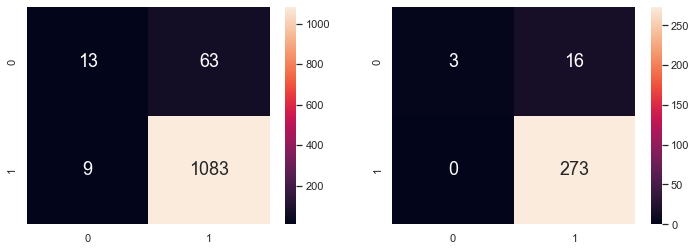

In [66]:
my_function("OverallQual","CentralAir")

Goodness of Fit of Model 	Train Dataset 4 Depths
Classification Accuracy 	: 0.9375
True Positive Rate 	: 0.9972477064220183
False Positive Rate 	: 0.8974358974358975

Goodness of Fit of Model 	Test Dataset 4 Depths
Classification Accuracy 	: 0.9315068493150684
True Positive Rate 	: 0.9890909090909091
False Positive Rate 	: 1.0


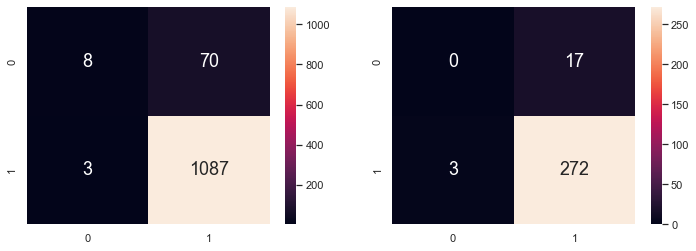

In [67]:
my_function("YearBuilt","CentralAir")

OverallQual is the better predictor as the test dataset has a much lower FPR than YearBuilt, it also has a higher TPR than YearBuilt

# Problem 3 : Understanding the Misclassified Samples

In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.

#### (a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.


[Text(1036.2857142857144, 782.784, 'SalePrice <= 98150.0\ngini = 0.117\nsamples = 1168\nvalue = [73, 1095]\nclass = Has CentralAC'),
 Text(531.4285714285714, 608.832, 'SalePrice <= 61691.5\ngini = 0.49\nsamples = 84\nvalue = [36, 48]\nclass = Has CentralAC'),
 Text(212.57142857142858, 434.88, 'SalePrice <= 46000.0\ngini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = No CentralAC'),
 Text(106.28571428571429, 260.928, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No CentralAC'),
 Text(318.8571428571429, 260.928, 'SalePrice <= 53500.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = No CentralAC'),
 Text(212.57142857142858, 86.976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Has CentralAC'),
 Text(425.14285714285717, 86.976, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No CentralAC'),
 Text(850.2857142857143, 434.88, 'SalePrice <= 97750.0\ngini = 0.466\nsamples = 73\nvalue = [27, 46]\nclass = Has CentralAC'),
 Text(744.0, 260.928, 'SalePrice <= 96750.0\ngini = 0.451\ns

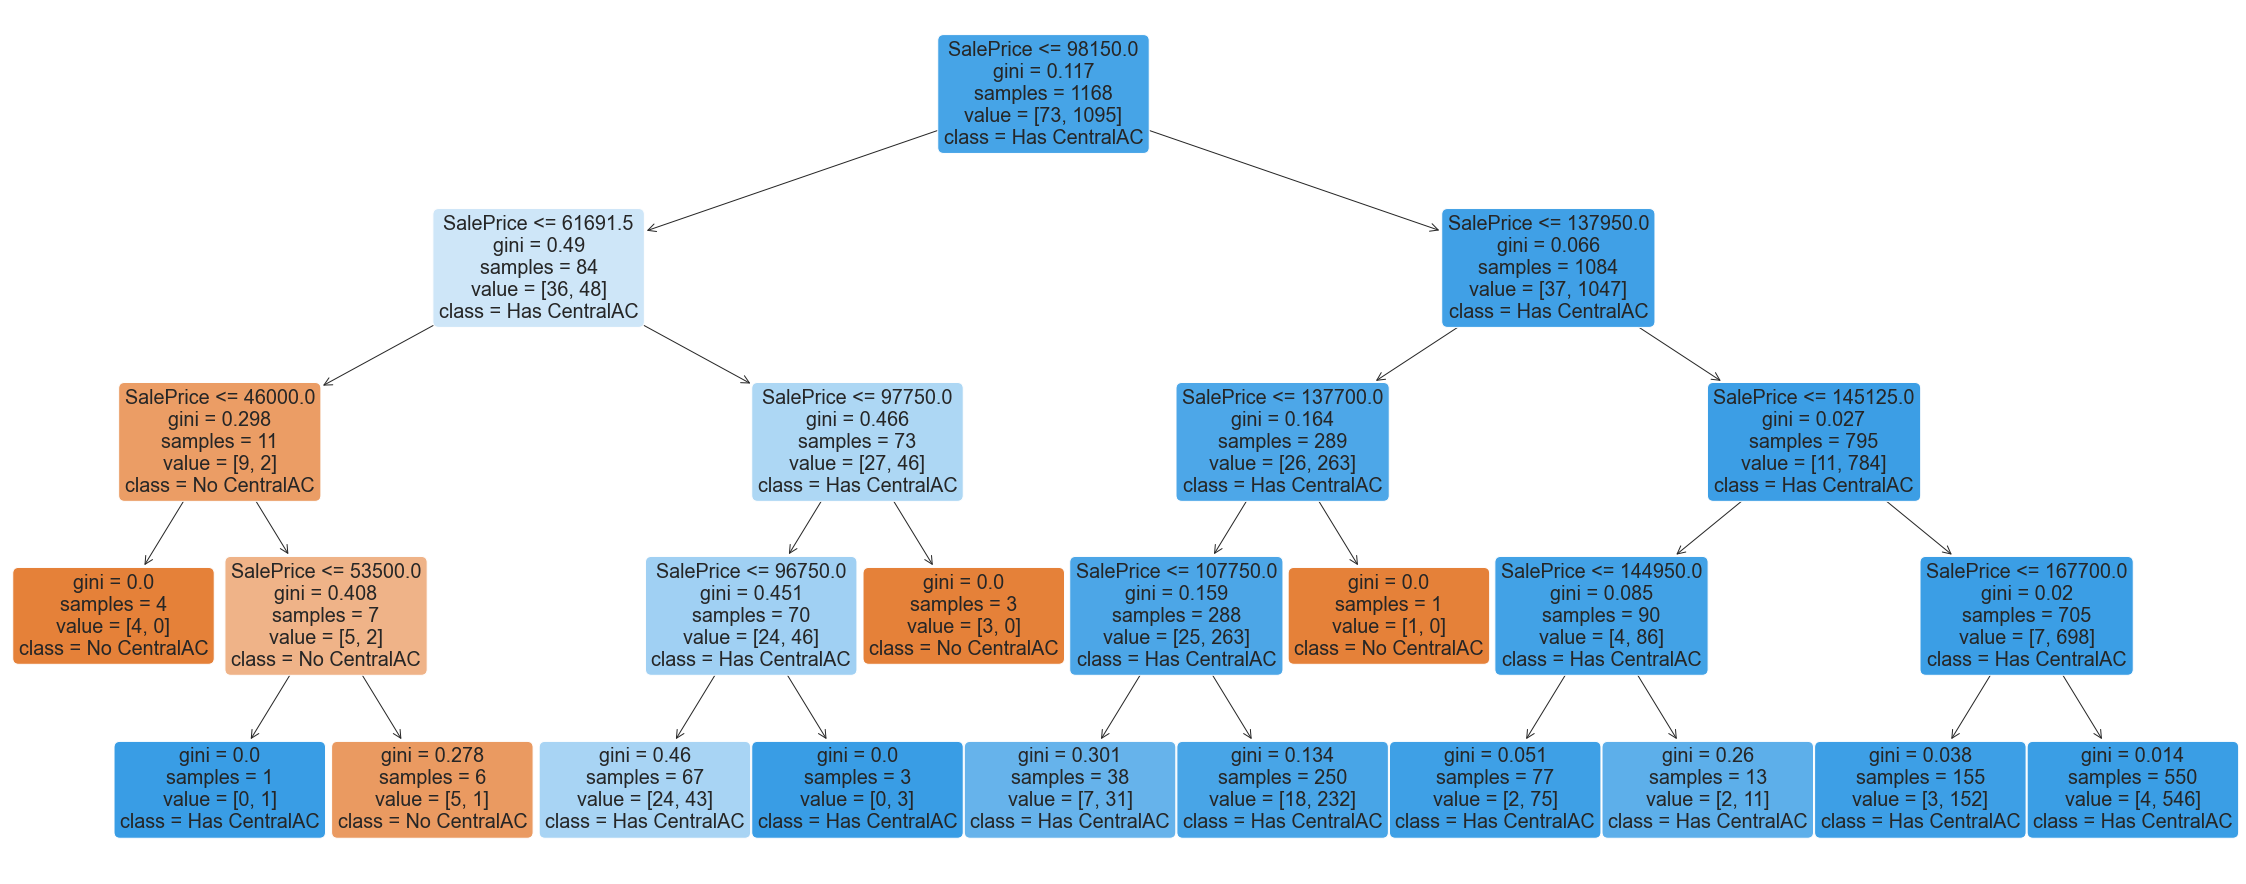

In [104]:
f = plt.figure(figsize=(40,16))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No CentralAC","Has CentralAC"])

The leaf node third from the left with gini = 0.46 has the highest number of false positives. Highest gini means that it has the highest chance of misclassification, thus for positives which are in blue, this would be the leaf node

In [128]:
leaf = pd.merge(SalePrice_train, CentralAir_train, left_index = True, right_index = True)
leaf = leaf[(leaf['SalePrice'] < 96750.0) & (leaf['SalePrice'] > 61691.5)]

print(len(leaf), "Samples")
print()

print(leaf)

67 Samples

      SalePrice CentralAir
1412      90000          N
462       62383          Y
1179      93000          Y
637       93000          Y
998       91000          N
...         ...        ...
912       88000          N
479       89471          Y
431       79900          Y
1449      92000          Y
88        85000          N

[67 rows x 2 columns]


#### (b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a). 

In [126]:
leaf = pd.merge(SalePrice_train, CentralAir_train, left_index = True, right_index = True)
leaf = leaf[(leaf['SalePrice'] < 96750.0) & (leaf['SalePrice'] > 61691.5)]

falsePositives = leaf = leaf[(leaf['CentralAir'] == 'N')]
print(len(falsePositives), "False Positives")
print()

print(falsePositives)

24 False Positives

      SalePrice CentralAir
1412      90000          N
998       91000          N
242       79000          N
98        83000          N
1035      84000          N
1137      94000          N
1090      92900          N
821       93000          N
514       96500          N
155       79000          N
1000      82000          N
1062      90000          N
1144      80000          N
1013      85000          N
342       87500          N
438       90350          N
39        82000          N
676       87000          N
352       95000          N
329       78000          N
264       73000          N
29        68500          N
912       88000          N
88        85000          N


Hints and Pointers

o In Part (a), you may print the model in Problem 1(a), or fit the max depth 4 classification tree model once again.

o You may simply “observe” which leaf node has the maximum number of False Positives; no need to code for it.

o Think about how data points (samples) end up in a leaf node based on tree splits; it will help you isolate samples.

o Part (b) is a simple continuation of part (a), where you need to “filter” out the False Positives from the samples.